In [10]:
import pandas as pd 
data  = pd.read_csv("res pred.csv")


print(data)

          res     absres       pred
0   15.964578  15.964578  27.605734
1    2.314496   2.314496   7.685504
2   17.432158  17.432158  24.130342
3    3.968905   3.968905  36.421720
4    1.398635   1.398635  50.007615
..        ...        ...        ...
65   0.119060   0.119060  43.787190
66   5.402239   5.402239  49.285261
67  -4.563181   4.563181   9.763181
68   3.400227   3.400227  53.396648
69 -14.364842  14.364842  17.177342

[70 rows x 3 columns]


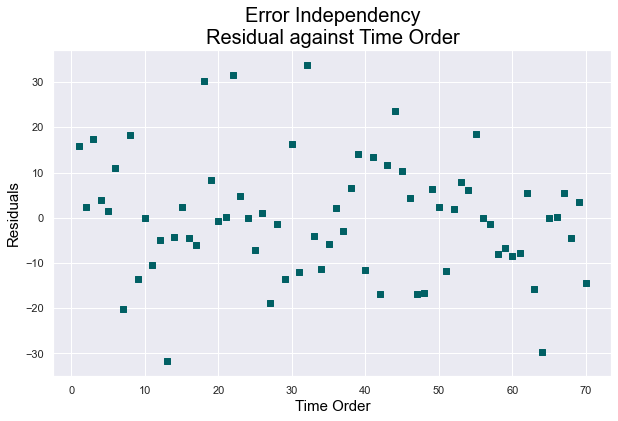

<Figure size 720x432 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
time=list(range(1,70+1))
plt.figure(figsize=(10,6))
plt.scatter(x=time, y=data["res"], color = "#016064", marker="s")
plt.title('Error Independency\nResidual against Time Order', fontsize=20, color="black")
plt.xlabel('Time Order', fontsize=15, color="black")
plt.ylabel('Residuals', fontsize=15, color="black")
plt.show()
plt.savefig('Autokorelasi.png')

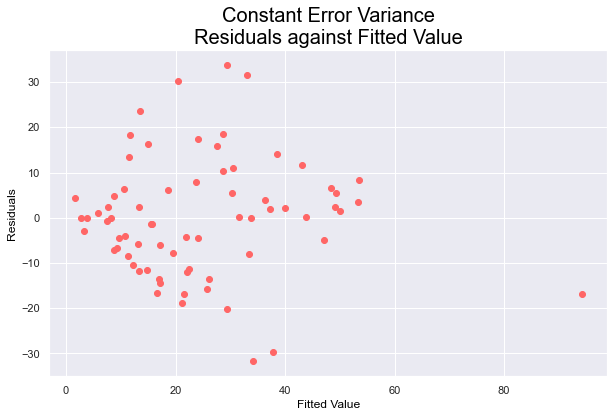

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(x=data["pred"], y=data["res"], color="#ff6666", marker="o")
plt.title('Constant Error Variance\nResiduals against Fitted Value', fontsize=20, color='black')
plt.xlabel('Fitted Value', fontsize=12, color='black')
plt.ylabel('Residuals', fontsize=12, color='black')
plt.show()

C:\Users\Nabila Dien Jasmine\AppData\Roaming\Python\Python310\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='res', ylabel='Density'>

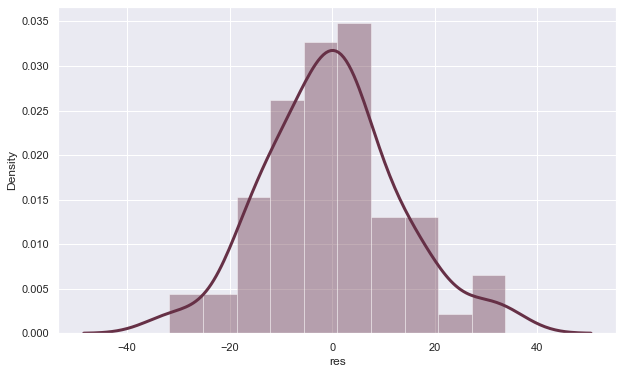

In [13]:
import seaborn as sns

sns.set(rc={'figure.figsize':(10,6)})
sns.distplot(data["res"], hist=True, kde=True, 
             color='#663046', 
             hist_kws={'edgecolor':'white'},
             kde_kws={'linewidth': 3})

In [18]:
from statsmodels.formula.api import ols
dataa = pd.read_csv("UAS Metstat.csv")
print(dataa)

dummy = pd.get_dummies(dataa["Merk_Smartphone"])
dataa["Jenis_Kelamin"] = pd.get_dummies(dataa["Jenis_Kelamin"], drop_first=True)
                            
model = ols("Sisa_Memori_Smartphone  ~ Ukuran_Memory_Internal_Smartphone + Ukuran_RAM_Smartphone + Usia_Kepemilikan_Smartphone  +  Jumlah_Aplikasi_yang_Dimiliki + RataRata_Penggunaan_Harian  + C(Jenis_Kelamin) + C(Merk_Smartphone)", data=dataa)
fitted_model = model.fit()
print(fitted_model.summary())


   Jenis_Kelamin Merk_Smartphone  Ukuran_Memory_Internal_Smartphone  \
0      Perempuan            Vivo                                128   
1      Laki-Laki          Redmi                                  64   
2      Laki-Laki          Xiaomi                                128   
3      Perempuan            Vivo                                128   
4      Perempuan          Xiaomi                                256   
..           ...             ...                                ...   
65     Perempuan            Oppo                                128   
66     Laki-Laki          Xiaomi                                256   
67     Perempuan          Xiaomi                                 16   
68     Perempuan         Samsung                                256   
69     Laki-Laki            Oppo                                 32   

    Ukuran_RAM_Smartphone  Usia_Kepemilikan_Smartphone  \
0                       4                          1.0   
1                       4      